In [28]:
import pandas as pd
import cufflinks as cf

import PortfolioAnalyser as pa

# Set cufflinks offline
cf.go_offline()

### Ler o ficheiro CSV

In [29]:
pd.read_csv('IS3Q.csv')

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 02, 2020",37.13,36.87,37.15,36.87,40.68K,2.02%
1,"Sep 01, 2020",36.40,36.40,36.49,36.13,26.46K,0.08%
2,"Aug 31, 2020",36.37,36.72,36.81,36.35,31.83K,-0.38%
3,"Aug 28, 2020",36.51,36.63,36.63,36.44,56.79K,-0.69%
4,"Aug 27, 2020",36.76,36.62,36.90,36.57,41.72K,0.60%
...,...,...,...,...,...,...,...
1480,"Oct 14, 2014",19.14,19.14,19.14,19.14,-,-0.26%
1481,"Oct 13, 2014",19.19,19.19,19.19,19.19,-,-0.83%
1482,"Oct 10, 2014",19.35,19.35,19.35,19.35,-,-1.48%
1483,"Oct 09, 2014",19.64,19.64,19.64,19.64,-,0.56%


##### Depois de vermos os nomes das colunas e apercebermo-nos das que queremos manter já podemos fazer a função para:
    
    - Colocar a coluna "Date" como indíce
    - Colocar as datas em formato de datas( da forma que estão o pandas não está a reconhecer como datas mas apenas
    como texto. CUIDADO com este erro. É MUITO comum.)

In [30]:
# Index_col diz qual é a coluna que deve ficar como indíce e parse_dates diz que o indíce é em formato data de data (é um datetime index)
pd.read_csv('IS3Q.csv', index_col='Date', parse_dates=True)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-09-02,37.13,36.87,37.15,36.87,40.68K,2.02%
2020-09-01,36.40,36.40,36.49,36.13,26.46K,0.08%
2020-08-31,36.37,36.72,36.81,36.35,31.83K,-0.38%
2020-08-28,36.51,36.63,36.63,36.44,56.79K,-0.69%
2020-08-27,36.76,36.62,36.90,36.57,41.72K,0.60%
...,...,...,...,...,...,...
2014-10-14,19.14,19.14,19.14,19.14,-,-0.26%
2014-10-13,19.19,19.19,19.19,19.19,-,-0.83%
2014-10-10,19.35,19.35,19.35,19.35,-,-1.48%


Já é uma evolução mas queremos seleccionar apenas a coluna Price e para isso apenas temos de fazer um pequeno ajuste.

No final adiciono o parentises rectos para dizer quais a(s) colunas com que quero ficar. Neste caso só o price MAS se quisesse por exemplo o Price e Vol. a parte extra seria "[['Price', 'Vol.']].

Aqui temos de ter atenção aos parentises (duplo parentises recto e o nome das colunas devem ter aspas, sejam simples ' ou duplas ")

In [31]:
pd.read_csv('IS3Q.csv', index_col='Date', parse_dates=True)[['Price']]

,Price
Date,
2020-09-02,37.13
2020-09-01,36.40
2020-08-31,36.37
2020-08-28,36.51
2020-08-27,36.76
...,...
2014-10-14,19.14
2014-10-13,19.19
2014-10-10,19.35


Isto já está bastante próximo do que queremos por isso vamos "guardar" o que temos acima numa variável.

In [32]:
IS3Q = pd.read_csv('IS3Q.csv', index_col='Date', parse_dates=True)[['Price']]
IS3Q

,Price
Date,
2020-09-02,37.13
2020-09-01,36.40
2020-08-31,36.37
2020-08-28,36.51
2020-08-27,36.76
...,...
2014-10-14,19.14
2014-10-13,19.19
2014-10-10,19.35


Isto é o que queremos mas já a pensar no futuro e como distinguir o IWDA do IS3Q vamos dar à coluna um nome igual ao ticker.

In [33]:
IS3Q.columns = ['IS3Q']
IS3Q

,IS3Q
Date,
2020-09-02,37.13
2020-09-01,36.40
2020-08-31,36.37
2020-08-28,36.51
2020-08-27,36.76
...,...
2014-10-14,19.14
2014-10-13,19.19
2014-10-10,19.35


Agora vamos fazer o mesmo com o IWDA. Uma vez que a fonte é a mesma (investing.com) muito provavélmente podemos usar a mesma função e nomes de colunas.

In [34]:
IWDA = pd.read_csv('IWDA.csv', index_col='Date', parse_dates=True)[['Price']]
IWDA.columns = ['IWDA']
IWDA

,IWDA
Date,
2020-09-02,56.81
2020-09-01,55.82
2020-08-31,55.63
2020-08-28,55.84
2020-08-27,56.28
...,...
2009-10-20,17.20
2009-10-19,17.32
2009-10-16,17.09


Agora que temos os dois ETFs em duas variáveis vamos junta-los na mesma DataFrame

In [35]:
ETFs = pa.merge_time_series(IS3Q, IWDA, how='inner')
ETFs

,IS3Q,IWDA
Date,,
2020-09-02,37.13,56.81
2020-09-01,36.40,55.82
2020-08-31,36.37,55.63
2020-08-28,36.51,55.84
2020-08-27,36.76,56.28
...,...,...
2014-10-14,19.14,30.79
2014-10-13,19.19,30.89
2014-10-10,19.35,31.15


Por uma razão de coerência e deve-se usar as datas sempre no mesmo formato e ordem. No nosso caso iremos sempre que possível usar datas em ordem ascendente.

In [36]:
ETFs = ETFs.sort_index(ascending=True)
ETFs

,IS3Q,IWDA
Date,,
2014-10-08,19.53,31.48
2014-10-09,19.64,31.62
2014-10-10,19.35,31.15
2014-10-13,19.19,30.89
2014-10-14,19.14,30.79
...,...,...
2020-08-27,36.76,56.28
2020-08-28,36.51,55.84
2020-08-31,36.37,55.63


A função merge_time_series tem algumas opções que serão usadas no futuro. Por enquanto apenas usaremos a how='inner'. Quer dizer que juntamos as séries temporais apenas em dias que ambas "existiram". Resumindo, dias em que há preços para ambos os ETFs.

Vamos agora fazer o gráfico de ambas os ETFs.

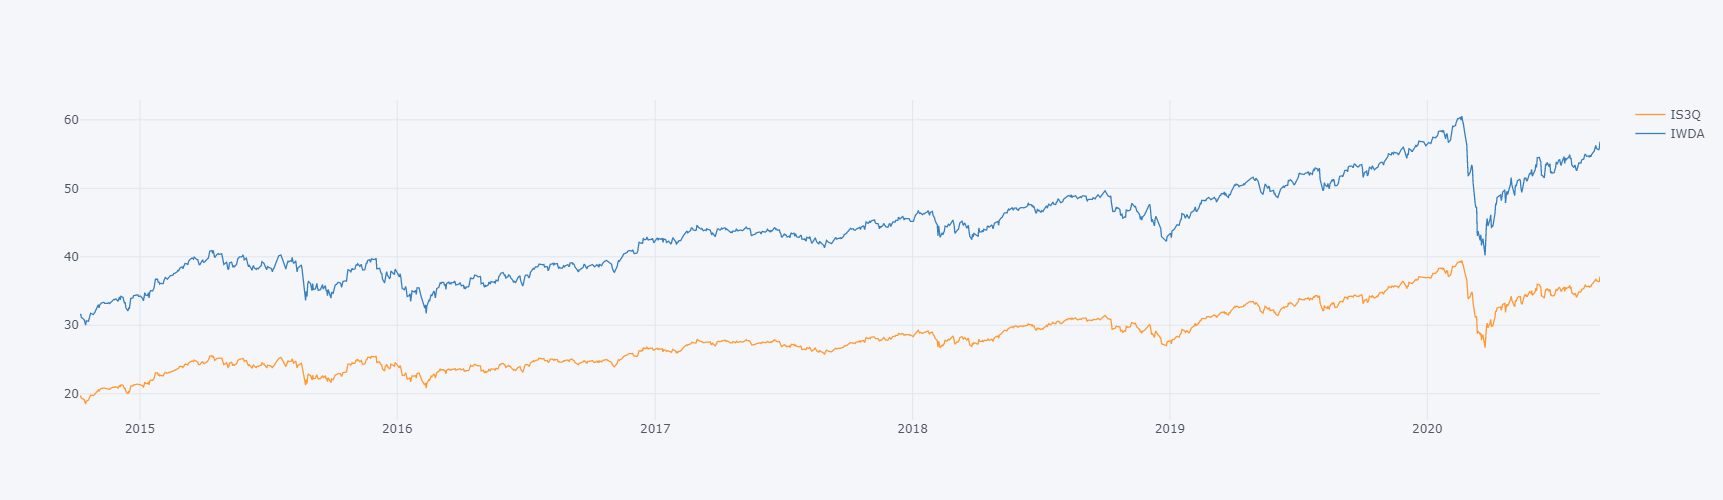

In [37]:
ETFs.iplot(dimensions=pa.dimensions)

Foi tão simples como colocar .iplot à frente da DataFrame dos ETFs. Adicionei a opção dimensions para que o gráfico não fique gigante (ou opcionalmente que fique do tamanho desejado).

Contudo, embora tenhamos feito algo bastante engraçado não é bem o que queremos. Continuamos a não conseguir comparar os ETFs porque estes têm preços diferentes. É preciso então fazer um gráfico de crescimento de cada ETFs. Felizmente também temos uma função para isso.

In [38]:
ETFs_gi = pa.compute_growth_index(ETFs)
ETFs_gi

,IS3Q,IWDA
Date,,
2014-10-08,100.00,100.00
2014-10-09,100.56,100.44
2014-10-10,99.08,98.95
2014-10-13,98.26,98.13
2014-10-14,98.00,97.81
...,...,...
2020-08-27,188.22,178.78
2020-08-28,186.94,177.38
2020-08-31,186.23,176.72


E finalmente é só fazer o gráfico comparativo:

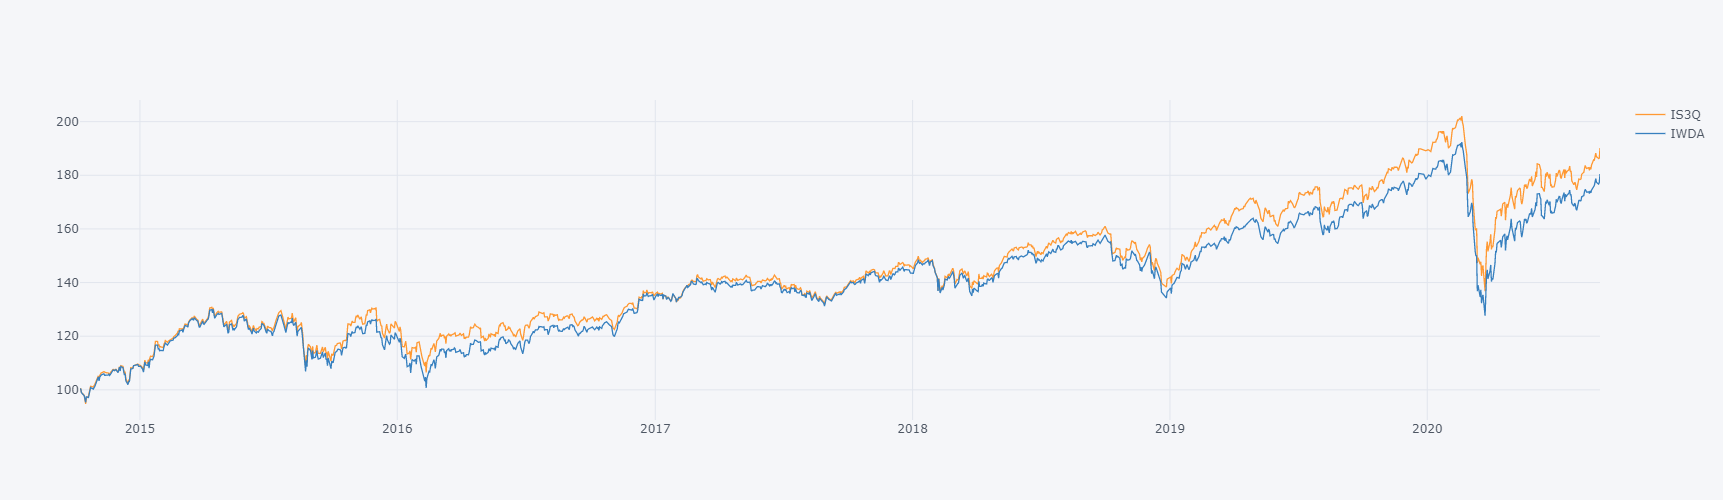

In [39]:
ETFs_gi.iplot(dimensions=pa.dimensions)